In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [215]:
profile = pd.read_csv('data/beer_profile_and_ratings.csv') # Read in profile
profile.columns = profile.columns.str.lower() # Convert column names to lowercase
styles = pd.read_csv('data/styles.csv') # Read in style mapping
df = profile.merge(styles, how='left', on='style') # Merge profile and styles
df = df.drop(columns = ['min ibu','review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews']) # Drop Review columns
df = df[df.category != 'Exclude'] # Remove excluded All Origin/Mixed styles

In [216]:
# Check for missing values
df.isnull().sum() # no missing values

name                0
style               0
brewery             0
beer name (full)    0
description         0
abv                 0
max ibu             0
astringency         0
body                0
alcohol             0
bitter              0
sweet               0
sour                0
salty               0
fruits              0
hoppy               0
spices              0
malty               0
category            0
sub_category        0
segment             0
dtype: int64

In [192]:
df.dtypes

name                 object
style                object
brewery              object
beer name (full)     object
description          object
abv                 float64
max ibu               int64
astringency           int64
body                  int64
alcohol               int64
bitter                int64
sweet                 int64
sour                  int64
salty                 int64
fruits                int64
hoppy                 int64
spices                int64
malty                 int64
category             object
sub_category         object
segment              object
dtype: object

In [193]:
df.columns

Index(['name', 'style', 'brewery', 'beer name (full)', 'description', 'abv',
       'max ibu', 'astringency', 'body', 'alcohol', 'bitter', 'sweet', 'sour',
       'salty', 'fruits', 'hoppy', 'spices', 'malty', 'category',
       'sub_category', 'segment'],
      dtype='object')

In [194]:
df.describe()

,abv,max ibu,astringency,body,alcohol,bitter,sweet,sour,salty,fruits,hoppy,spices,malty
count,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000,2686.000000
mean,6.666783,40.353686,16.962398,48.544304,17.550261,39.194713,60.028295,32.913254,1.022710,38.071482,43.068131,15.901340,78.969099
std,2.524013,21.157915,10.364263,26.070198,17.528277,25.904100,33.083349,35.018127,2.177044,31.251895,30.365119,18.303777,39.374790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,25.000000,10.000000,31.000000,6.000000,19.250000,35.250000,11.000000,0.000000,13.000000,20.000000,5.000000,48.000000
50%,6.000000,35.000000,15.000000,42.000000,11.000000,34.000000,56.000000,23.000000,0.000000,29.000000,36.000000,10.000000,77.000000
75%,7.850000,50.000000,22.000000,60.000000,22.000000,55.000000,78.750000,41.000000,1.000000,58.000000,59.000000,21.000000,107.000000
max,57.500000,100.000000,81.000000,175.000000,126.000000,150.000000,219.000000,284.000000,48.000000,175.000000,172.000000,173.000000,239.000000


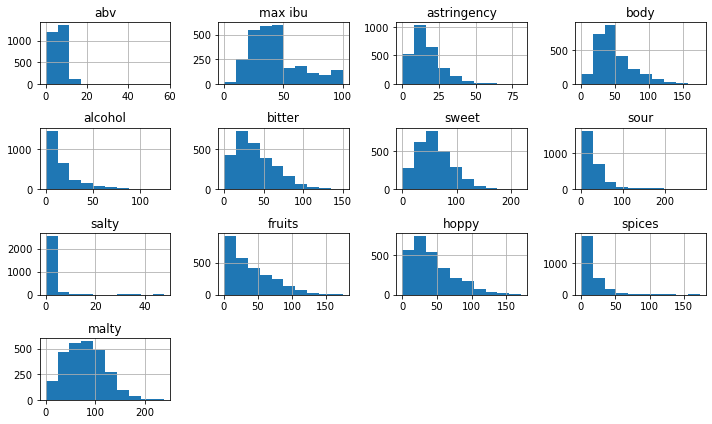

In [195]:
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

## Ale vs. Lager

### Ale vs. Lager EDA

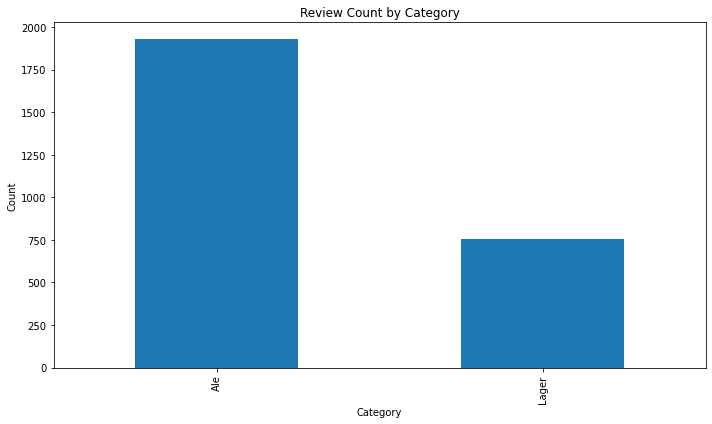

In [196]:
style_group = df.groupby('category').size().reset_index(name='count').sort_values(by='count', ascending = False)
style_group.plot(x='category', y='count', kind='bar', figsize=(10, 6), legend=False)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Review Count by Category')
plt.tight_layout()
plt.show()

In [197]:
style_group

,category,count
0,Ale,1931
1,Lager,755


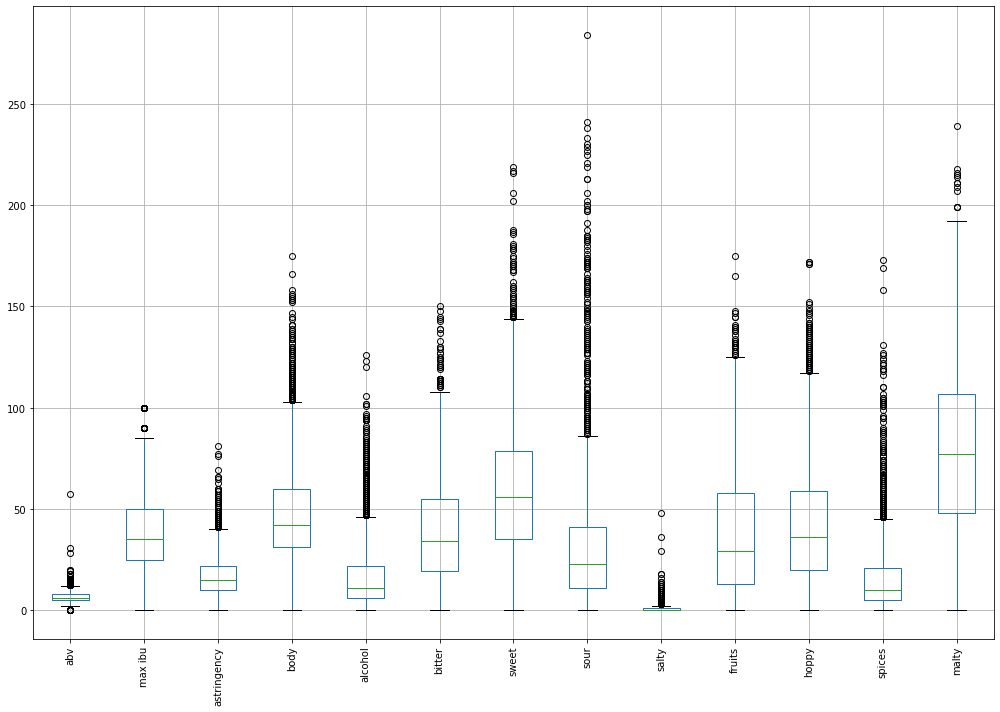

In [198]:
df.boxplot(figsize=(14, 10))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

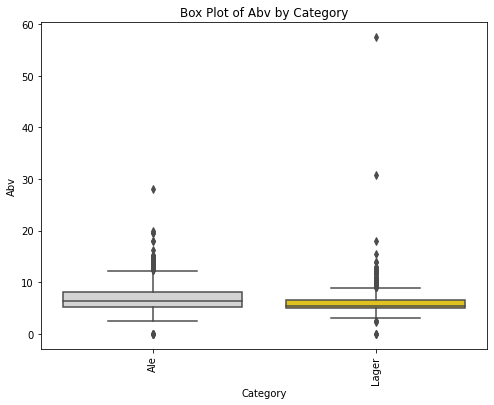

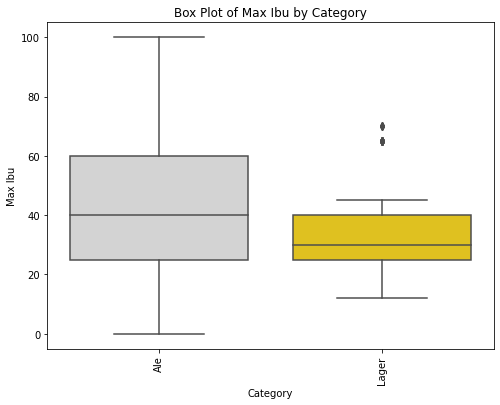

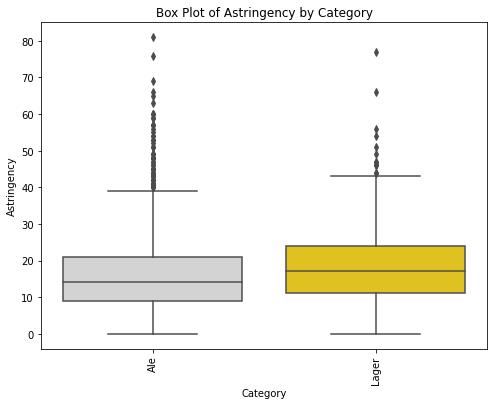

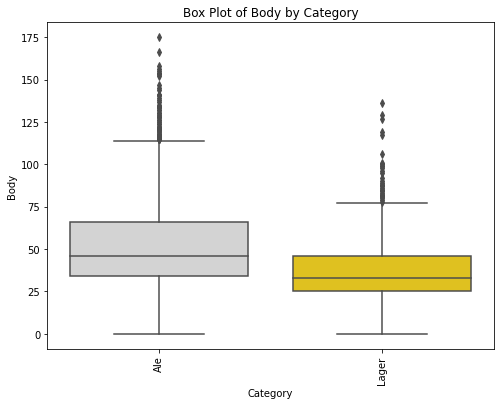

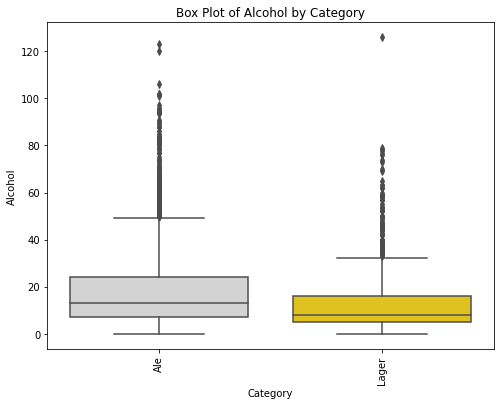

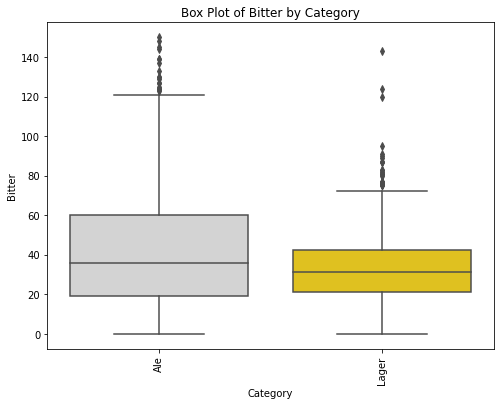

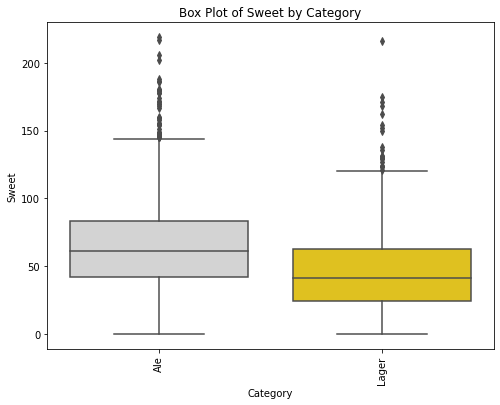

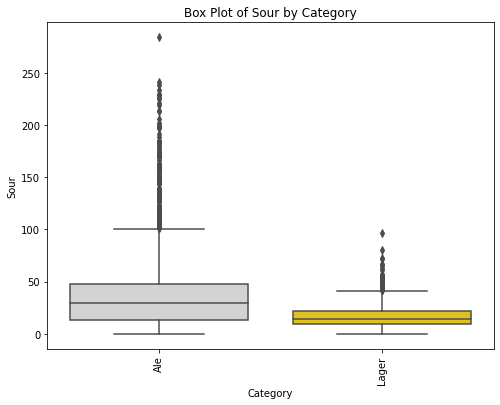

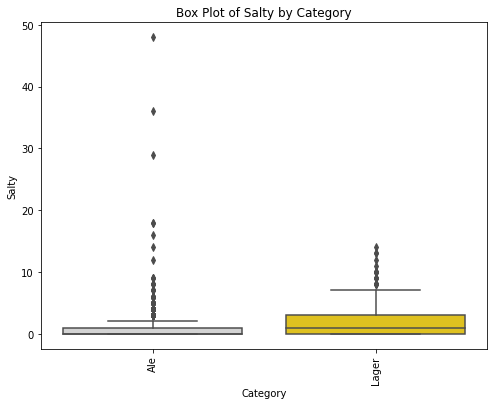

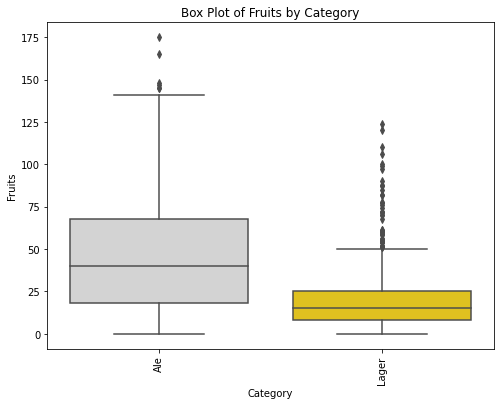

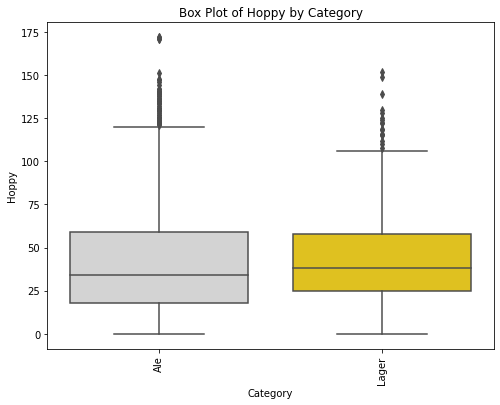

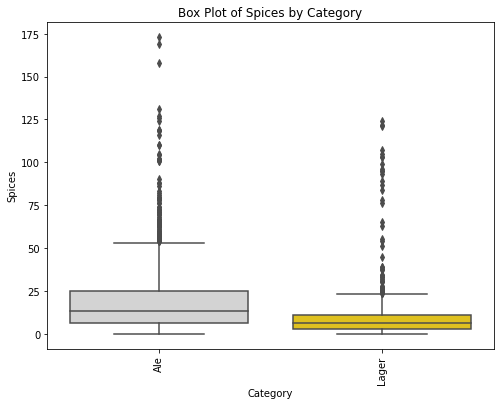

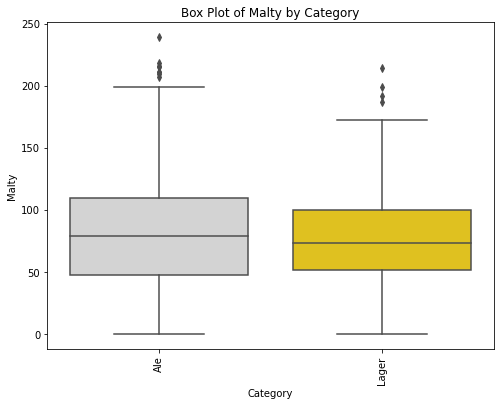

In [199]:
#For numerical vs. categorical: box plots
numerical_cols = df.select_dtypes(include=[np.number]).columns
pal = {'Ale': 'lightgray', 'Lager': 'gold'}

for var in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=df, palette=pal)
    plt.xlabel('Category')
    plt.ylabel(var.title())
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {var.title()} by Category')
    plt.show()

## Segment EDA


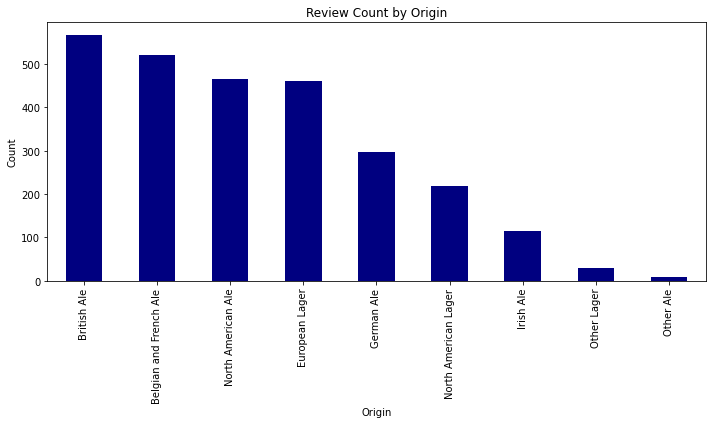

In [200]:
origin_group = df.groupby('segment').size().reset_index(name='count').sort_values(by='count', ascending = False)
origin_group.plot(x='segment', y='count', kind='bar', figsize=(10, 6), legend=False, color = 'navy')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Review Count by Origin')
plt.tight_layout()
plt.show()

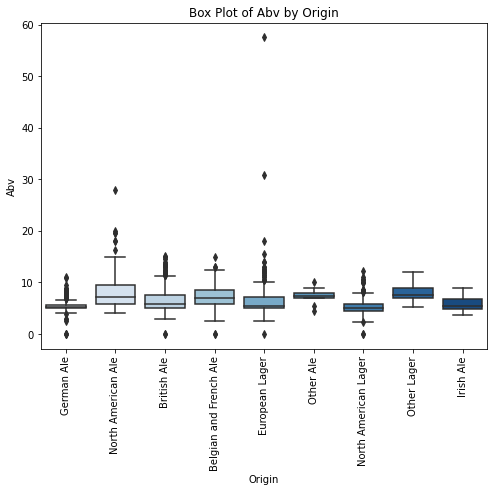

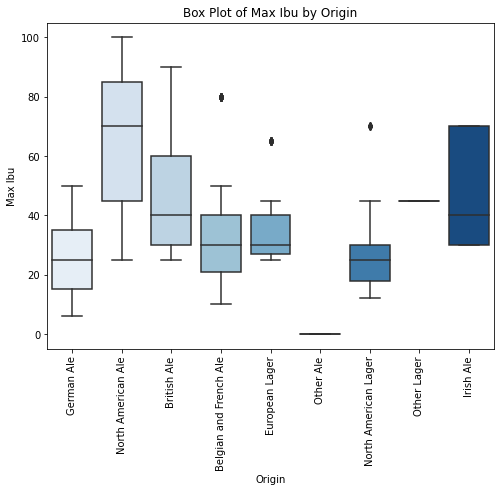

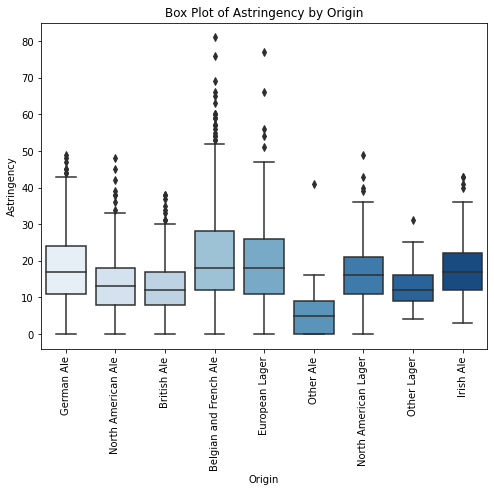

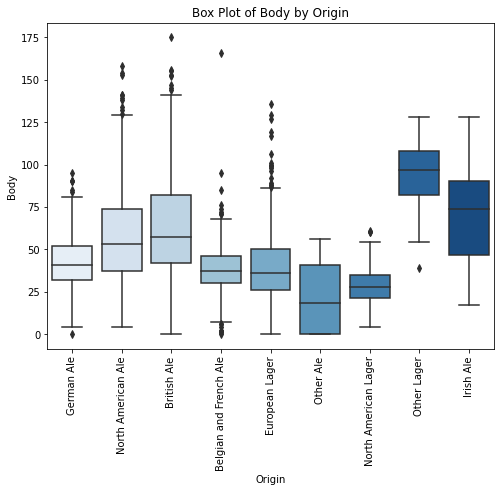

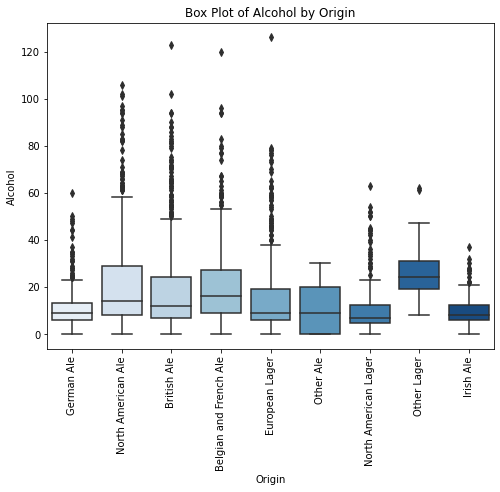

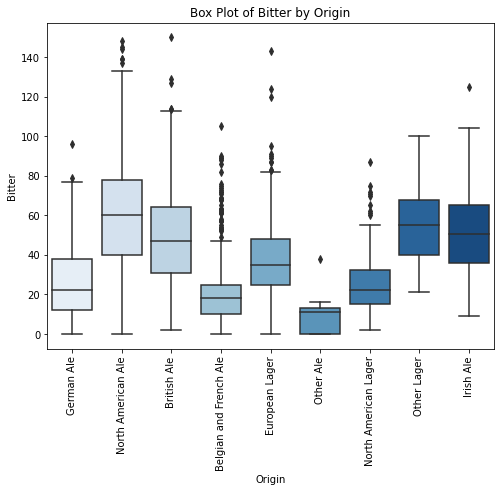

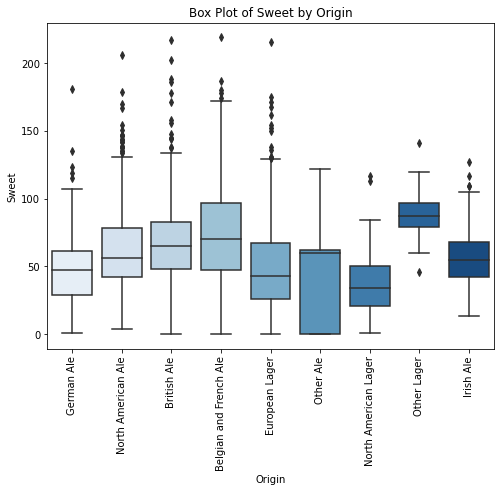

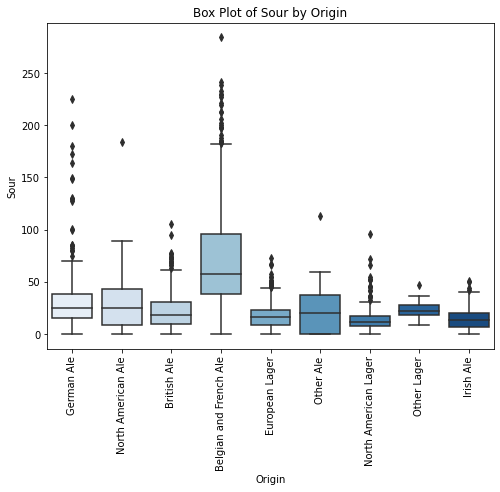

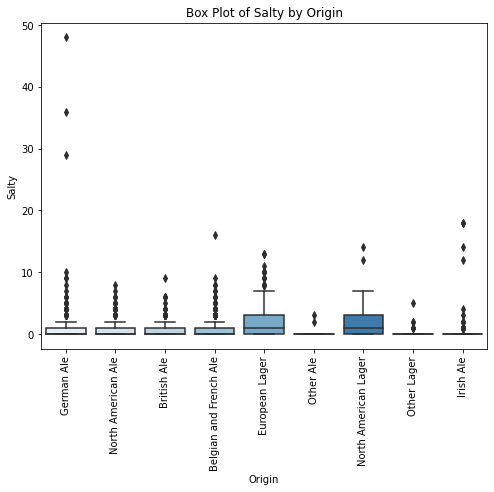

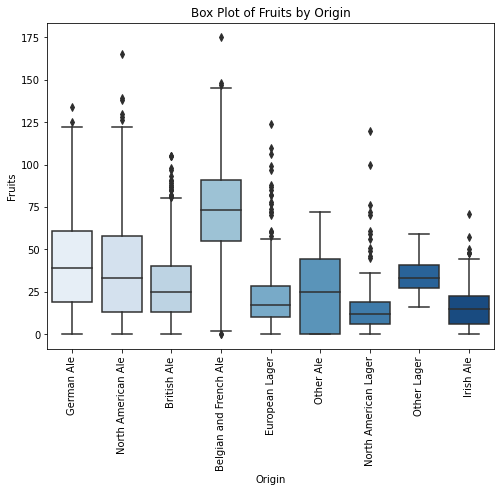

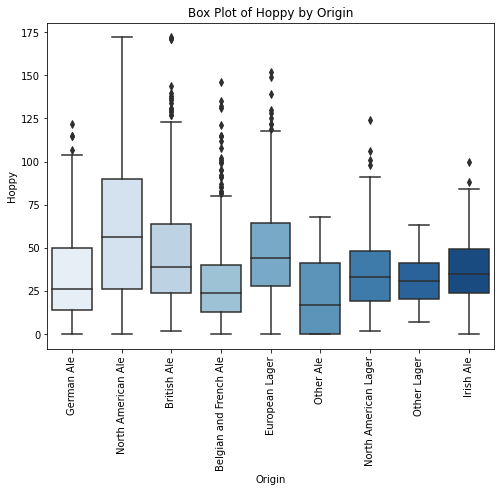

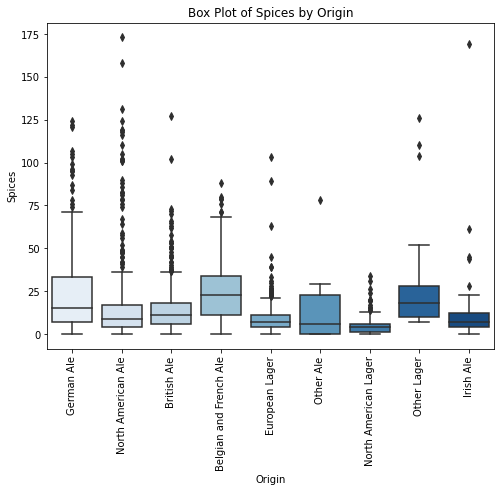

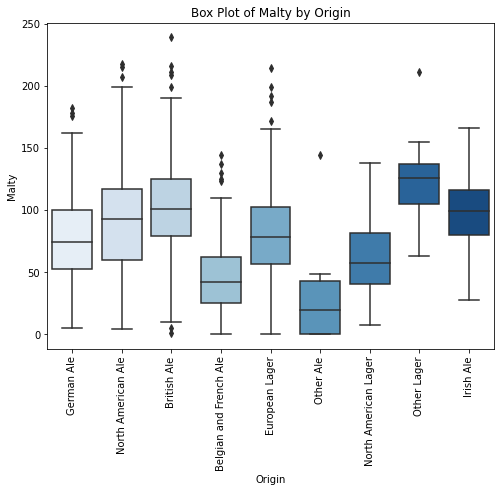

In [201]:
for var in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='segment', y=var, data=df, palette = 'Blues')
    plt.xlabel('Origin')
    plt.ylabel(var.title())
    plt.xticks(rotation=90)
    plt.title(f'Box Plot of {var.title()} by Origin')
    plt.show()

### Ale vs. Lager Modeling

In [281]:
def confusion(df, y_test, y_pred):
    # Confusion Matrix
    cats = list(y_test.unique())
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=cats, 
                yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

**Select Variables**

In [282]:
X = df[['abv','max ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']]
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [283]:
k_best = SelectKBest(score_func=chi2, k='all')
X_train_selected = k_best.fit_transform(X_train, y_train)
feature_scores = k_best.scores_
feature_names =X.columns
feature_ranking = list(zip(feature_names, feature_scores))
feature_ranking.sort(key=lambda x: x[1], reverse=True)

for i, (feature_name, score) in enumerate(feature_ranking):
    print(f"Rank {i + 1}: {feature_name} (Score: {score:.2f})")
# abv, astringency, alcohol, bitter, salty, hoppy, malty

Rank 1: fruits (Score: 6814.17)
Rank 2: sour (Score: 6344.43)
Rank 3: spices (Score: 1847.70)
Rank 4: sweet (Score: 1836.67)
Rank 5: body (Score: 1826.59)
Rank 6: max ibu (Score: 1632.43)
Rank 7: alcohol (Score: 716.36)
Rank 8: bitter (Score: 595.46)
Rank 9: salty (Score: 253.51)
Rank 10: astringency (Score: 109.36)
Rank 11: abv (Score: 62.75)
Rank 12: malty (Score: 38.93)
Rank 13: hoppy (Score: 0.68)


In [284]:
X = df[['fruits', 'sour', 'body', 'sweet', 'spices', 'max ibu', 'alcohol', 'bitter', 'salty', 'astringency', 'malty']]
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

Best Parameters:
{'C': 0.001}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.86      0.91      0.88       389
       Lager       0.72      0.62      0.66       149

    accuracy                           0.83       538
   macro avg       0.79      0.76      0.77       538
weighted avg       0.82      0.83      0.82       538



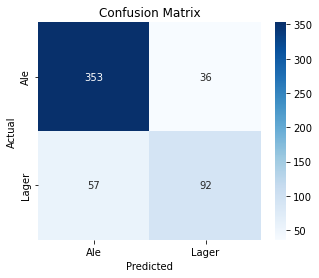

In [206]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

log_classifier = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=log_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_lr_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

In [207]:
print("Coefficients:", best_lr_model.coef_)

Coefficients: [[-0.02705998 -0.05497238 -0.04676331  0.02281575 -0.01244928 -0.04393823
   0.02546918  0.0062187   0.06932105  0.09477515 -0.00053749]]


**K-Nearest Neighbor**

Best Parameters:
{'n_neighbors': 5}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.89      0.88      0.89       389
       Lager       0.70      0.71      0.71       149

    accuracy                           0.84       538
   macro avg       0.80      0.80      0.80       538
weighted avg       0.84      0.84      0.84       538



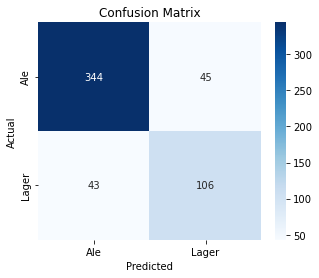

In [208]:
param_grid = {
    'n_neighbors': [2, 5, 10, 15]
}

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_knn_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Support Vector Machine**

Best Parameters:
{'C': 10, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.91      0.90      0.90       389
       Lager       0.74      0.76      0.75       149

    accuracy                           0.86       538
   macro avg       0.83      0.83      0.83       538
weighted avg       0.86      0.86      0.86       538



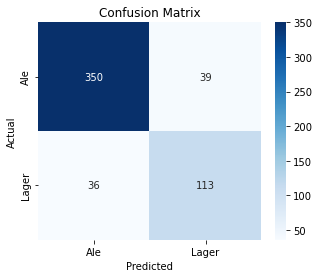

In [209]:
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'], 
}

svm_classifier = svm.SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Decision Tree**

Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.88      0.89      0.88       389
       Lager       0.70      0.68      0.69       149

    accuracy                           0.83       538
   macro avg       0.79      0.79      0.79       538
weighted avg       0.83      0.83      0.83       538



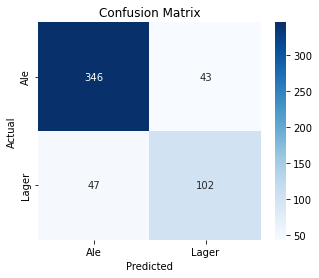

In [210]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'criterion': ['gini', 'entropy']  
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_dt_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Random Forest**

Best Parameters:
{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.90      0.95      0.92       389
       Lager       0.84      0.72      0.77       149

    accuracy                           0.88       538
   macro avg       0.87      0.83      0.85       538
weighted avg       0.88      0.88      0.88       538



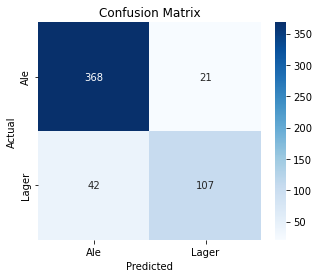

In [211]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**ADA Boosting a Random Forest**

Best Parameters:
{'learning_rate': 0.5, 'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.90      0.95      0.92       389
       Lager       0.84      0.73      0.78       149

    accuracy                           0.89       538
   macro avg       0.87      0.84      0.85       538
weighted avg       0.88      0.89      0.88       538



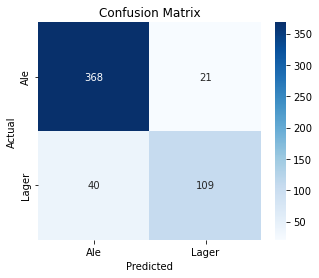

In [212]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 0.8]
}

base  = best_rf_model
adaboost_classifier = AdaBoostClassifier(base_estimator=base, random_state=42)
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_adaboost_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_adaboost_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Gradient Boosting**

Best Parameters:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

         Ale       0.92      0.93      0.92       362
       Lager       0.85      0.82      0.83       168

    accuracy                           0.90       530
   macro avg       0.88      0.88      0.88       530
weighted avg       0.90      0.90      0.90       530



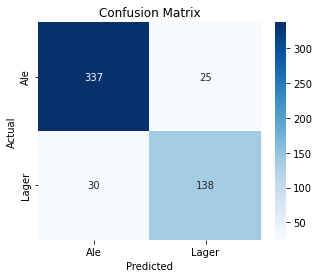

In [285]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

gboost_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters:')
print(best_params)

best_gboost_model = grid_search.best_estimator_
y_pred = best_gboost_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

In [298]:
misclassified_indices = (y_pred != y_test)#.nonzero()
misclassified_samples = X_test[misclassified_indices]
misclassified_samples
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

misclassified_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

misclassified_samples['True'] = true_labels
misclassified_samples['Predicted'] = predicted_labels

print(misclassified_samples[misclassified_samples['True'] == 'Lager'].merge(df, how='left', on = ['fruits', 'sour', 'body', 'sweet', 'spices', 'max ibu', 'alcohol',
       'bitter', 'salty', 'astringency', 'malty']).groupby(['True', 'Predicted', 'style']).size())

True   Predicted  style                           
Lager  Ale        Bock - Eisbock                      1
                  Bock - Maibock                      1
                  Bock - Traditional                  3
                  Lager - American Amber / Red        3
                  Lager - European Dark               4
                  Lager - European Pale               1
                  Lager - European Strong             1
                  Lager - Kellerbier / Zwickelbier    2
                  Lager - Light                       2
                  Lager - Märzen / Oktoberfest        2
                  Lager - Schwarzbier                 5
                  Lager - Vienna                      2
                  Pilsner - Imperial                  3
dtype: int64


## Segment Classification

In [217]:
def confusion(df, y_test, y_pred):
    # Confusion Matrix
    cats = list(y_test.unique())
    cm = confusion_matrix(y_test, y_pred, labels=cats)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cats, 
                yticklabels=cats)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [218]:
df = df[(df.segment != 'Other Ale') & (df.segment != 'Other Lager')]

In [219]:
df.segment.unique()

array(['German Ale', 'North American Ale', 'British Ale',
       'Belgian and French Ale', 'European Lager', 'North American Lager',
       'Irish Ale'], dtype=object)

In [220]:
X = df[['abv','max ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty']]
y = df.segment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = SelectKBest(score_func=chi2, k='all')
X_train_selected = k_best.fit_transform(X_train, y_train)
chi2_scores = k_best.scores_
p_values = k_best.pvalues_
#print(p_values)

feature_scores = k_best.scores_
feature_names =X.columns

# Combine feature names and scores
feature_ranking = list(zip(feature_names, feature_scores))

# Sort the features by their scores in descending order
feature_ranking.sort(key=lambda x: x[1], reverse=True)

# Print the ranked features
for i, (feature_name, score) in enumerate(feature_ranking):
    print(f"Rank {i + 1}: {feature_name} (Score: {score:.2f})")

Rank 1: sour (Score: 27796.50)
Rank 2: fruits (Score: 19804.63)
Rank 3: bitter (Score: 11513.28)
Rank 4: malty (Score: 10980.68)
Rank 5: max ibu (Score: 9288.65)
Rank 6: body (Score: 6549.96)
Rank 7: hoppy (Score: 5404.30)
Rank 8: spices (Score: 4596.85)
Rank 9: sweet (Score: 3849.29)
Rank 10: alcohol (Score: 2064.76)
Rank 11: astringency (Score: 1290.70)
Rank 12: salty (Score: 399.98)
Rank 13: abv (Score: 218.89)


In [222]:
X = df[['sour', 'fruits', 'bitter', 'malty', 'max ibu', 'body', 'hoppy', 'spices', 'sweet', 'alcohol', 'astringency']]
y = df.segment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

Best Parameters:
{'C': 1}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.85      0.87      0.86       119
           British Ale       0.57      0.57      0.57       114
        European Lager       0.51      0.60      0.55        98
            German Ale       0.52      0.55      0.54        40
             Irish Ale       0.50      0.28      0.36        18
    North American Ale       0.59      0.58      0.59        83
  North American Lager       0.72      0.53      0.61        58

              accuracy                           0.63       530
             macro avg       0.61      0.57      0.58       530
          weighted avg       0.63      0.63      0.63       530



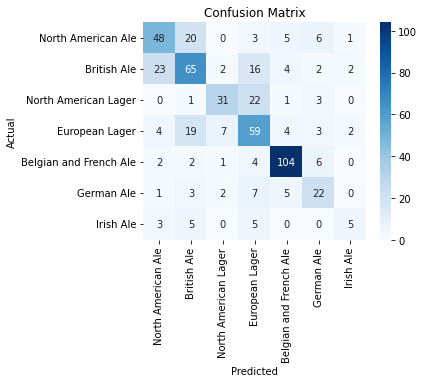

In [181]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

log_classifier = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(estimator=log_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_lr_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**K-Nearest Neighbor**

Best Parameters:
{'n_neighbors': 5}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.85      0.91      0.88       119
           British Ale       0.54      0.61      0.58       114
        European Lager       0.59      0.66      0.62        98
            German Ale       0.63      0.60      0.62        40
             Irish Ale       0.32      0.39      0.35        18
    North American Ale       0.71      0.53      0.61        83
  North American Lager       0.68      0.48      0.57        58

              accuracy                           0.65       530
             macro avg       0.62      0.60      0.60       530
          weighted avg       0.66      0.65      0.65       530



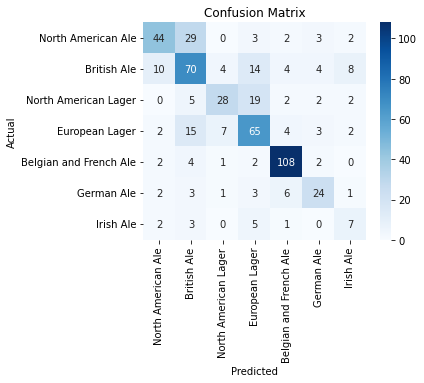

In [182]:
param_grid = {
    'n_neighbors': [2, 5, 10, 15]
}

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_knn_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Support Vector Machine**

Best Parameters:
{'C': 10, 'kernel': 'rbf'}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.92      0.91      0.91       119
           British Ale       0.63      0.70      0.66       114
        European Lager       0.65      0.72      0.68        98
            German Ale       0.60      0.65      0.63        40
             Irish Ale       0.67      0.44      0.53        18
    North American Ale       0.81      0.67      0.74        83
  North American Lager       0.67      0.59      0.62        58

              accuracy                           0.72       530
             macro avg       0.71      0.67      0.68       530
          weighted avg       0.73      0.72      0.72       530



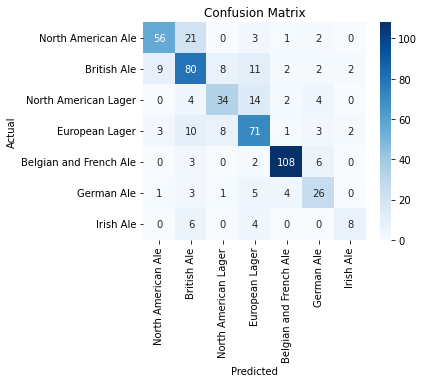

In [183]:
param_grid = {
    'C': [0.1, 1, 10], 
    'kernel': ['linear', 'rbf', 'poly'], 
}

svm_classifier = svm.SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Decision Tree**

Best Parameters:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.92      0.84      0.88       119
           British Ale       0.71      0.66      0.68       114
        European Lager       0.68      0.80      0.73        98
            German Ale       0.59      0.72      0.65        40
             Irish Ale       0.46      0.61      0.52        18
    North American Ale       0.77      0.75      0.76        83
  North American Lager       0.79      0.64      0.70        58

              accuracy                           0.74       530
             macro avg       0.70      0.72      0.70       530
          weighted avg       0.75      0.74      0.74       530



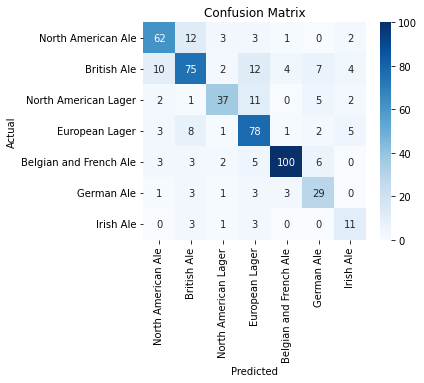

In [184]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'criterion': ['gini', 'entropy']  
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_dt_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Random Forest**

Best Parameters:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.91      0.97      0.93       119
           British Ale       0.71      0.75      0.73       114
        European Lager       0.69      0.79      0.73        98
            German Ale       0.76      0.70      0.73        40
             Irish Ale       0.64      0.39      0.48        18
    North American Ale       0.87      0.83      0.85        83
  North American Lager       0.76      0.59      0.66        58

              accuracy                           0.78       530
             macro avg       0.76      0.71      0.73       530
          weighted avg       0.78      0.78      0.78       530



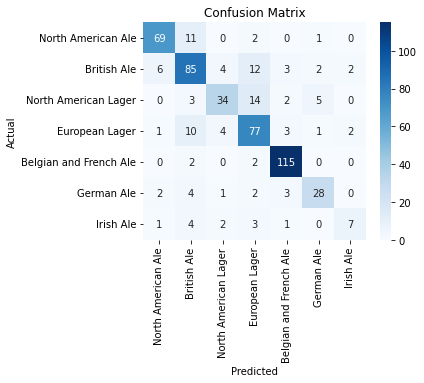

In [185]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

In [186]:
misclassified_indices = (y_pred != y_test)#.nonzero()
misclassified_samples = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

misclassified_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

misclassified_df.groupby(['True Labels', 'Predicted Labels']).size()
#misclassified_df.to_csv("misclassified_samples.csv", index=False)

True Labels             Predicted Labels      
Belgian and French Ale  British Ale                2
                        European Lager             2
British Ale             Belgian and French Ale     3
                        European Lager            12
                        German Ale                 2
                        Irish Ale                  2
                        North American Ale         6
                        North American Lager       4
European Lager          Belgian and French Ale     3
                        British Ale               10
                        German Ale                 1
                        Irish Ale                  2
                        North American Ale         1
                        North American Lager       4
German Ale              Belgian and French Ale     3
                        British Ale                4
                        European Lager             2
                        North American Ale         2

**ADA Boosting a Random Forest**

Best Parameters:
{'learning_rate': 0.1, 'n_estimators': 50}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.91      0.96      0.93       119
           British Ale       0.72      0.75      0.73       114
        European Lager       0.68      0.79      0.73        98
            German Ale       0.76      0.78      0.77        40
             Irish Ale       0.64      0.39      0.48        18
    North American Ale       0.88      0.82      0.85        83
  North American Lager       0.76      0.59      0.66        58

              accuracy                           0.78       530
             macro avg       0.76      0.72      0.74       530
          weighted avg       0.79      0.78      0.78       530



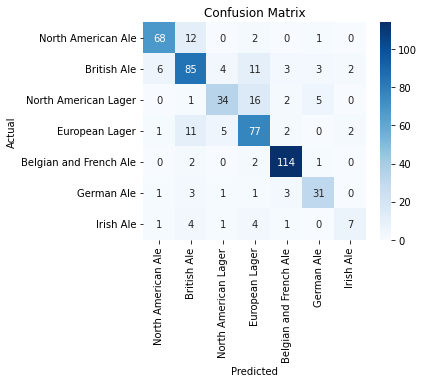

In [187]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 0.8]
}

base  = best_rf_model
adaboost_classifier = AdaBoostClassifier(base_estimator=base, random_state=42)
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_adaboost_model = grid_search.best_estimator_

print('Best Parameters:')
print(best_params)

y_pred = best_adaboost_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

**Gradient Boosting**

Best Parameters:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Classification Report:
                        precision    recall  f1-score   support

Belgian and French Ale       0.93      0.95      0.94       119
           British Ale       0.73      0.75      0.74       114
        European Lager       0.73      0.76      0.74        98
            German Ale       0.77      0.85      0.81        40
             Irish Ale       0.56      0.50      0.53        18
    North American Ale       0.90      0.86      0.88        83
  North American Lager       0.76      0.64      0.69        58

              accuracy                           0.80       530
             macro avg       0.77      0.76      0.76       530
          weighted avg       0.80      0.80      0.80       530



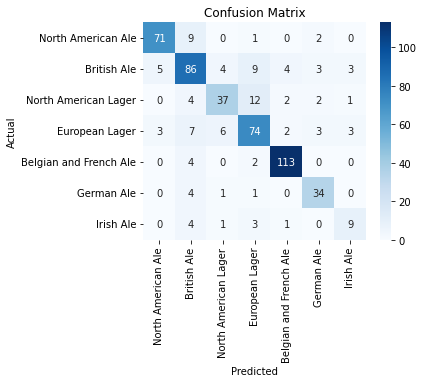

In [223]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

gboost_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters:')
print(best_params)

best_gboost_model = grid_search.best_estimator_
y_pred = best_gboost_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
confusion(df, y_test, y_pred)

In [280]:
misclassified_indices = (y_pred != y_test)#.nonzero()
misclassified_samples = X_test[misclassified_indices]
misclassified_samples
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

misclassified_df = pd.DataFrame({
    'True Labels': true_labels,
    'Predicted Labels': predicted_labels
})

misclassified_samples['True'] = true_labels
misclassified_samples['Predicted'] = predicted_labels

print(misclassified_samples[misclassified_samples['True'] == 'Irish Ale'].merge(df, how='left', on = ['sour', 'fruits', 'bitter', 'malty', 'max ibu', 'body', 'hoppy',
      'spices', 'sweet', 'alcohol', 'astringency']).groupby(['True', 'Predicted', 'style']).size())
print('\n')
print(misclassified_samples[misclassified_samples['True'] == 'North American Lager'].merge(df, how='left', on = ['sour', 'fruits', 'bitter', 'malty', 'max ibu', 'body', 'hoppy',
      'spices', 'sweet', 'alcohol', 'astringency']).groupby(['True', 'Predicted', 'style']).size())

True       Predicted               style            
Irish Ale  Belgian and French Ale  Red Ale - Irish      1
           British Ale             Red Ale - Irish      1
                                   Stout - Irish Dry    3
           European Lager          Red Ale - Irish      2
                                   Stout - Irish Dry    1
           North American Lager    Red Ale - Irish      1
dtype: int64


True                  Predicted               style                       
North American Lager  Belgian and French Ale  Lager - American Amber / Red    1
                                              Lager - Light                   1
                      British Ale             Lager - American Amber / Red    1
                                              Lager - Light                   1
                                              Lager - Märzen / Oktoberfest    2
                      European Lager          Lager - American                3
                             